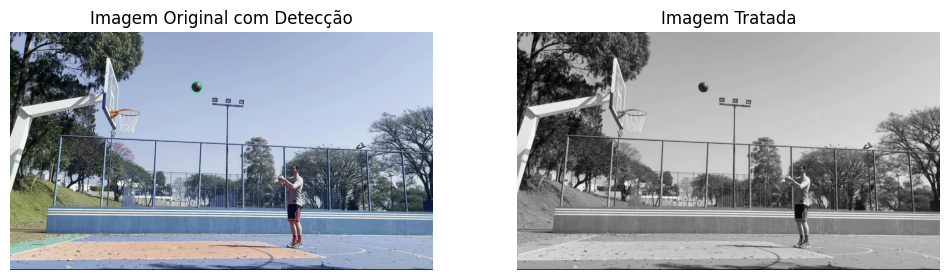

In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def identificar_bola_de_basquete_no_frame(video_path, frame_num):
    # Abrir o vídeo
    cap = cv2.VideoCapture(video_path)
    
    # Verificar se o vídeo foi aberto corretamente
    if not cap.isOpened():
        print("Erro ao abrir o vídeo.")
        return
    
    # Ir para o frame específico
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    
    # Ler o frame desejado
    ret, frame = cap.read()
    
    if not ret:
        print(f"Erro ao capturar o frame {frame_num}.")
        return
    
    # Converter para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Aplicar um desfoque para reduzir ruídos
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Usar a Transformada de Hough para detectar círculos
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 
                               dp=1.2,  # Aumente para reduzir a detecção de círculos
                               minDist=100,  # Aumente a distância mínima entre círculos
                               param1=200,  # Limite superior do Canny (ajustável)
                               param2=53,  # Limite de votos para considerar um círculo (aumente para mais seletividade)
                               minRadius=20,  # Defina o tamanho mínimo do círculo
                               maxRadius=50)  # Defina o tamanho máximo do círculo

    # Se círculos forem encontrados
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        
        for (x, y, radius) in circles:
            # Desenhar o círculo ao redor da bola
            cv2.circle(frame, (x, y), radius, (0, 255, 0), 2)
            # Desenhar um ponto no centro do círculo
            cv2.circle(frame, (x, y), 2, (0, 0, 255), 3)
    
    # Converter o frame para RGB para exibir com matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh_rgb = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)
    
    # Exibir o frame processado
    # plt.figure(figsize=(8, 6))
    # plt.imshow(frame_rgb)
    # plt.axis('off')
    # plt.show()

    # Exibir a imagem original e a imagem tratada lado a lado
    plt.figure(figsize=(12, 6))
    
    # Imagem original com círculos detectados
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title('Imagem Original com Detecção')
    plt.axis('off')
    
    # Imagem tratada
    plt.subplot(1, 2, 2)
    plt.imshow(thresh_rgb)
    plt.title('Imagem Tratada')
    plt.axis('off')

    plt.show()

    # Liberar o vídeo
    cap.release()

# Exemplo de uso
# Testar a detecção de bola no frame 100 de um vídeo
identificar_bola_de_basquete_no_frame('/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:20:59.686277.mp4', 348)
# identificar_bola_de_basquete_no_frame('/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:31:04.449809.mp4', 500)

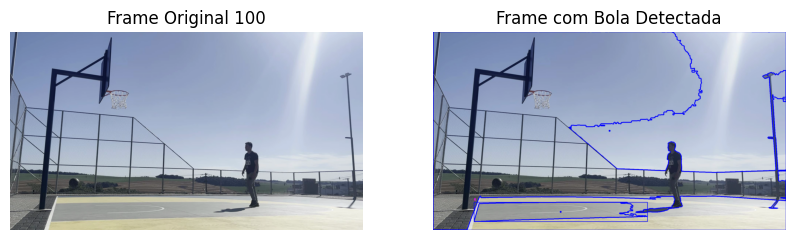

In [4]:
# Primeiro, certifique-se de ter instalado cvzone e opencv
# !pip install cvzone opencv-python

import cv2
import cvzone
import numpy as np
from matplotlib import pyplot as plt

# Função para processar um frame específico e identificar a bola
def detect_basketball_in_frame(video_path, frame_number):
    # Carregar o vídeo
    cap = cv2.VideoCapture(video_path)

    # Definir o frame desejado
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Ler o frame desejado
    ret, frame = cap.read()
    
    if not ret:
        print(f"Não foi possível ler o frame {frame_number}")
        cap.release()
        return None, None

    # Converter o frame para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Aplicar um blur para suavizar a imagem e reduzir o ruído
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Aplicar threshold binário para destacar possíveis objetos (bola)
    _, binary_image = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY_INV)

    # Usar o cvzone para encontrar contornos
    image_with_contours, contours = cvzone.findContours(frame, binary_image, minArea=500)

    # Loop pelos contornos para verificar se algum parece ser a bola
    for contour in contours:
        # Calcular o centro e o raio do contorno
        (x, y), radius = cv2.minEnclosingCircle(contour['cnt'])

        # Filtrar por um tamanho aproximado da bola
        if 15 < radius < 50:  # Ajustar esses valores conforme necessário
            # Desenhar o círculo ao redor da bola
            cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 0), 3)
            cv2.circle(frame, (int(x), int(y)), 2, (0, 0, 255), 3)  # centro da bola

    # Liberar o vídeo
    cap.release()

    return frame, image_with_contours

# Parâmetros
video_path = '/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:31:04.449809.mp4'  # Substitua pelo caminho do seu vídeo
frame_number = 100  # Número do frame que deseja processar

# Processar o frame específico do vídeo e identificar a bola
frame_original, frame_with_ball = detect_basketball_in_frame(video_path, frame_number)

# Exibir os resultados usando matplotlib
if frame_original is not None:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Exibir frame original
    axs[0].imshow(cv2.cvtColor(frame_original, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f'Frame Original {frame_number}')
    axs[0].axis('off')

    # Exibir frame com a bola detectada
    axs[1].imshow(cv2.cvtColor(frame_with_ball, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Frame com Bola Detectada')
    axs[1].axis('off')

    plt.show()

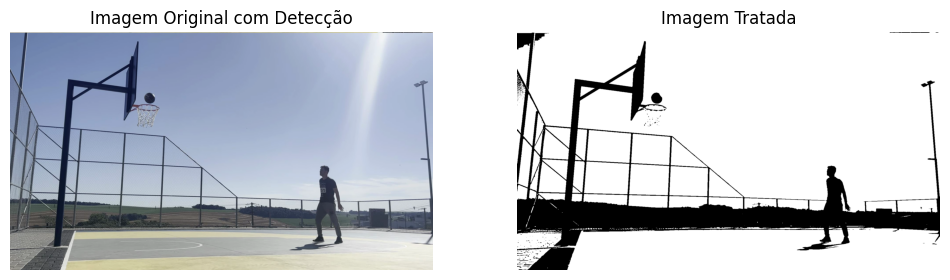

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def identificar_bola_de_basquete_no_frame(video_path, frame_num):
    # Abrir o vídeo
    cap = cv2.VideoCapture(video_path)
    
    # Verificar se o vídeo foi aberto corretamente
    if not cap.isOpened():
        print("Erro ao abrir o vídeo.")
        return
    
    # Ir para o frame específico
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    
    # Ler o frame desejado
    ret, frame = cap.read()
    
    if not ret:
        print(f"Erro ao capturar o frame {frame_num}.")
        return
    
    # Converter para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Aplicar um desfoque Gaussian mais forte para reduzir ruídos
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Aplicar uma limiarização binária para destacar objetos circulares
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_OTSU)
    
    # Usar a Transformada de Hough para detectar círculos na imagem tratada
    circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 
                               dp=1.2, 
                               minDist=100, 
                               param1=200, 
                               param2=53, 
                               minRadius=20, 
                               maxRadius=50)

    # Se círculos forem encontrados
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, radius) in circles:
            # Desenhar o círculo na imagem original
            cv2.circle(frame, (x, y), radius, (0, 255, 0), 2)
            # Desenhar um ponto no centro
            cv2.circle(frame, (x, y), 2, (0, 0, 255), 3)
    
    # Converter as imagens para RGB para exibir com matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

    # Exibir a imagem original e a imagem tratada lado a lado
    plt.figure(figsize=(12, 6))
    
    # Imagem original com círculos detectados
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title('Imagem Original com Detecção')
    plt.axis('off')
    
    # Imagem tratada
    plt.subplot(1, 2, 2)
    plt.imshow(thresh_rgb)
    plt.title('Imagem Tratada')
    plt.axis('off')
    
    plt.show()

    # Liberar o vídeo
    cap.release()

# identificar_bola_de_basquete_no_frame('/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:20:59.686277.mp4', 205)
identificar_bola_de_basquete_no_frame('/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:31:04.449809.mp4', 500)

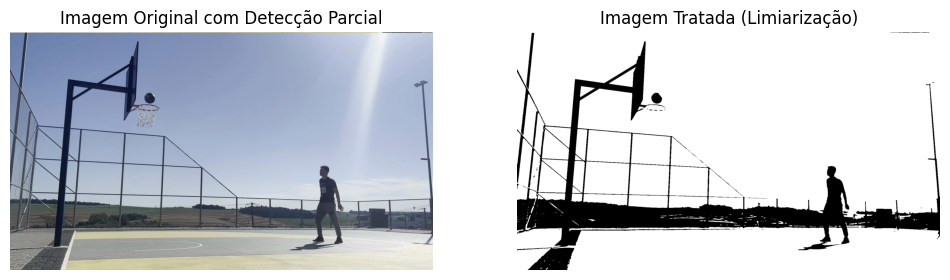

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def identificar_bola_de_basquete_no_frame(video_path, frame_num):
    # Abrir o vídeo
    cap = cv2.VideoCapture(video_path)
    
    # Verificar se o vídeo foi aberto corretamente
    if not cap.isOpened():
        print("Erro ao abrir o vídeo.")
        return
    
    # Ir para o frame específico
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    
    # Ler o frame desejado
    ret, frame = cap.read()
    
    if not ret:
        print(f"Erro ao capturar o frame {frame_num}.")
        return
    
    # Converter para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Aplicar um desfoque Gaussian mais forte para reduzir ruídos
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # Aplicar uma limiarização binária para destacar objetos circulares
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
    
    # Usar a Transformada de Hough para detectar círculos na imagem tratada
    circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 
                               dp=1.2, 
                               minDist=100, 
                               param1=200, 
                               param2=53, 
                               minRadius=20, 
                               maxRadius=50)

    # Se círculos forem encontrados
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, radius) in circles:
            # Desenhar apenas uma parte do círculo (70% dele)
            start_angle = 0  # Ângulo inicial
            end_angle = 250  # Ângulo final (ajustável para pegar cerca de 70% do círculo)
            
            # Desenhar apenas um arco parcial (70% do círculo)
            cv2.ellipse(frame, (x, y), (radius, radius), 0, start_angle, end_angle, (0, 255, 0), 2)
            # Desenhar um ponto no centro do círculo
            cv2.circle(frame, (x, y), 2, (0, 0, 255), 3)
    
    # Converter as imagens para RGB para exibir com matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

    # Exibir a imagem original e a imagem tratada lado a lado
    plt.figure(figsize=(12, 6))
    
    # Imagem original com círculo parcial detectado
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title('Imagem Original com Detecção Parcial')
    plt.axis('off')
    
    # Imagem tratada com limiarização
    plt.subplot(1, 2, 2)
    plt.imshow(thresh_rgb)
    plt.title('Imagem Tratada (Limiarização)')
    plt.axis('off')
    
    plt.show()

    # Liberar o vídeo
    cap.release()



# Exemplo de uso
# Testar a detecção de bola no frame 205 de um vídeo
# identificar_bola_de_basquete_no_frame('/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:20:59.686277.mp4', 205)
identificar_bola_de_basquete_no_frame('/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:31:04.449809.mp4', 500)

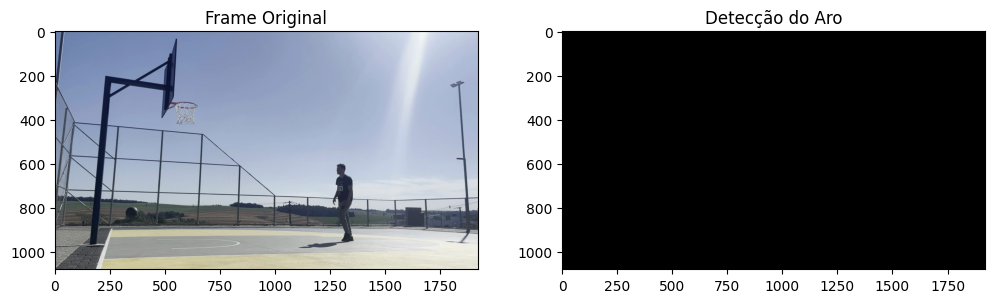

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Função para ajustar o contraste e a luminosidade da imagem
def ajustar_contraste(img, alpha=1, beta=30):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Carregar o vídeo e selecionar um frame específico para análise
video_path = '/Users/willianklein/Projetos/shot_basketball_detection/data/video_shotings_2024-10-15 22:31:04.449809.mp4'  # Substitua pelo caminho do seu vídeo
cap = cv2.VideoCapture(video_path)
frame_num = 100  # Defina o número do frame que você deseja usar

# Ler o frame específico
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
ret, frame = cap.read()
if not ret:
    print("Erro ao carregar o frame.")
    cap.release()
else:
    # Ajuste de contraste e luminosidade
    frame_ajustado = ajustar_contraste(frame)

    # Converter para espaço de cor HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Intervalo de cor alaranjado fraco em HSV
    laranja_fraco_baixo = np.array([5, 50, 50])   # Limite inferior
    laranja_fraco_alto = np.array([20, 255, 255]) # Limite superior

    # Criar máscara para o aro
    mask = cv2.inRange(hsv, laranja_fraco_baixo, laranja_fraco_alto)

    # Aplicar a máscara na imagem original
    resultado = cv2.bitwise_and(frame, frame, mask=mask)

    # Exibir o frame ajustado e o resultado da máscara
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title("Frame Original")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
    plt.title("Detecção do Aro")

    plt.show()

cap.release()